# GSEA for Phase 1 Warm vs. Control Samples 
(generated with featureCounts metaFeature)

In [51]:
library(topGO)
library(KEGGREST)
library(dplyr)
library(clusterProfiler)
library(ggridges)
library(ggplot2)

### Prep for analysis

Reading in dataframe of results from DESeq2 of phase 1 warm vs. control samples (ignoring phase 2)

In [9]:
data <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/FC_sig_p1wc.csv')
head(data)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,0.01357395,0.0000000,4.465315,0.0000000,1.0000000,NA
2,LOC111126949,0.01030321,0.0000000,4.465315,0.0000000,1.0000000,NA
3,LOC111110729,0.00000000,NA,NA,NA,NA,NA
4,LOC111112434,0.20274494,0.0000000,4.465314,0.0000000,1.0000000,NA
5,LOC111120752,0.91710261,0.9936836,1.376995,0.7216317,0.4705209,NA
6,LOC111128944,0.00000000,NA,NA,NA,NA,NA


cleaning up dataframe before analysis

In [10]:
# selecting only the columns I want to use
data2 <- select(data, X, log2FoldChange, padj)

# renaming columns
colnames(data2) <- c('geneID', 'lfc', 'padj')

head(data2)

,geneID,lfc,padj
,<chr>,<dbl>,<dbl>
1,LOC111116054,0.0000000,NA
2,LOC111126949,0.0000000,NA
3,LOC111110729,NA,NA
4,LOC111112434,0.0000000,NA
5,LOC111120752,0.9936836,NA
6,LOC111128944,NA,NA


In [11]:
# creating a numeric vector with geneID associated with p-value adjusted
geneList <- data2$padj
names(geneList) <- data2$geneID

# omitting genes with NA values for padj
geneList <- na.omit(geneList)

head(geneList)
length(geneList) # 6,526 genes with a value for p-adjusted

LOC111124802 LOC111101273 LOC111101250 LOC111101262 LOC111133260 LOC111113503 
  0.12668347   0.35521598   0.04006346   0.76010399   0.18132945   0.80966375

[1] 8063

loading in csv file of a table that matches GO ID terms to gene IDs

csv file was obtained from NCBI and manipulated in excel

In [12]:
# reading in csv file
geneID2GO <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/GO_enrichment_analysis/geneID2GO.txt', sep='\t')

# renaming columns
colnames(geneID2GO) = c('gene','GO_id')

head(geneID2GO)
dim(geneID2GO) # have 22,654 unique genes that have GO annotations

,gene,GO_id
,<chr>,<chr>
1,LOC111133408,GO:2001070
2,LOC111121603,"GO:2000781,GO:2000781"
3,LOC111132389,GO:2000145
4,LOC111115105,"GO:1990904,GO:1990904"
5,LOC111129853,"GO:1990904,GO:1990904"
6,LOC111101512,GO:1990904


[1] 22654     2

creating annotation file for GO objects

In [13]:
# have to create annotation file
geneID2GO <- readMappings(file = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/GO_enrichment_analysis/geneID2GO.txt')

# remove header
geneID2GO <- geneID2GO[-1] 

head(geneID2GO)

$LOC111133408
[1] "GO:2001070"

$LOC111121603
[1] "GO:2000781" "GO:2000781"

$LOC111132389
[1] "GO:2000145"

$LOC111115105
[1] "GO:1990904" "GO:1990904"

$LOC111129853
[1] "GO:1990904" "GO:1990904"

$LOC111101512
[1] "GO:1990904"

In [14]:
# creating list of gene names from geneID2GO object
geneNames <- names(geneID2GO)
head(geneNames)

[1] "LOC111133408" "LOC111121603" "LOC111132389" "LOC111115105" "LOC111129853"
[6] "LOC111101512"

for GO analysis, you need to specify a selection function - this tells the program what makes a gene signficant

In [15]:
topDiffGenes <- function(allScore) {
    return(allScore < 0.05) # returns T/F for p-values<0.05
}

x <- topDiffGenes(geneList)
sum(x) ## the number of selected genes

[1] 677

### GO analysis 
**for molecular function**

In [16]:
# creating GO term for molecular function
GOdata_MF <- new("topGOdata", 
               description = 'all genes in phase 1 warm vs. control',
               ontology = "MF", 
               allGenes = geneList, # all annotated genes
               geneSel = topDiffGenes, # tells program how to select a gene of interest (pvalue<0.05)
               annot = annFUN.gene2GO, 
               gene2GO = geneID2GO)

GOdata_MF


Building most specific GOs .....

	( 890 GO terms found. )


Build GO DAG topology ..........

	( 1311 GO terms and 1717 relations. )


Annotating nodes ...............

	( 4492 genes annotated to the GO terms. )




------------------------- topGOdata object -------------------------

 Description:
   -  all genes in phase 1 warm vs. control 

 Ontology:
   -  MF 

 8063 available genes (all genes from the array):
   - symbol:  LOC111124802 LOC111101273 LOC111101250 LOC111101262 LOC111133260  ...
   - score :  0.1266834654 0.3552159756 0.04006345918 0.7601039866 0.1813294484  ...
   - 677  significant genes. 

 4492 feasible genes (genes that can be used in the analysis):
   - symbol:  LOC111101273 LOC111101250 LOC111101262 LOC111133260 LOC111119377  ...
   - score :  0.3552159756 0.04006345918 0.7601039866 0.1813294484 0.08641455441  ...
   - 400  significant genes. 

 GO graph (nodes with at least  1  genes):
   - a graph with directed edges
   - number of nodes = 1311 
   - number of edges = 1717 

------------------------- topGOdata object -------------------------


In [17]:
# creating results object for molecular function
resultKS_MF <- runTest(GOdata_MF, algorithm = "weight01", statistic = "ks")

# putting results into table
tab_MF <- GenTable(GOdata_MF, raw.p.value = resultKS_MF, topNodes = length(resultKS_MF@score), numChar = 120)

head(tab_MF, 15)
dim(tab_MF) #1,207 GO terms


			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 1311 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


	 Level 13:	1 nodes to be scored	(0 eliminated genes)


	 Level 12:	3 nodes to be scored	(0 eliminated genes)


	 Level 11:	4 nodes to be scored	(2 eliminated genes)


	 Level 10:	14 nodes to be scored	(6 eliminated genes)


	 Level 9:	64 nodes to be scored	(9 eliminated genes)


	 Level 8:	114 nodes to be scored	(48 eliminated genes)


	 Level 7:	247 nodes to be scored	(1032 eliminated genes)


	 Level 6:	364 nodes to be scored	(1253 eliminated genes)


	 Level 5:	249 nodes to be scored	(2169 eliminated genes)


	 Level 4:	174 nodes to be scored	(3084 eliminated genes)


	 Level 3:	57 nodes to be scored	(3965 eliminated genes)


	 Level 2:	19 nodes to be scored	(4216 eliminated genes)


	 Level 1:	1 nodes to be scored	(4468 eliminated genes)



,GO.ID,Term,Annotated,Significant,Expected,raw.p.value
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,GO:0051538,"3 iron, 4 sulfur cluster binding",2,2,0.18,0.00035
2,GO:0016040,glutamate synthase (NADH) activity,2,2,0.18,0.00035
3,GO:0008569,minus-end-directed microtubule motor activity,23,5,2.05,0.00200
4,GO:0045505,dynein intermediate chain binding,23,5,2.05,0.00200
5,GO:0051959,dynein light intermediate chain binding,23,5,2.05,0.00200
6,GO:0008184,glycogen phosphorylase activity,2,2,0.18,0.00224
7,GO:0046975,histone H3K36 methyltransferase activity,2,2,0.18,0.00284
8,GO:0046976,histone H3K27 methyltransferase activity,1,1,0.09,0.00356
9,GO:0004817,cysteine-tRNA ligase activity,2,2,0.18,0.00430


[1] 1311    6

GO analysis for **cellular component**

In [18]:
# creating GO term for cellular component
GOdata_CC <- new("topGOdata", 
               description = 'all genes in phase 1 warm vs. control',
               ontology = "CC", 
               allGenes = geneList, # all annotated genes
               geneSel = topDiffGenes, # tells program how to select a gene of interest (pvalue<0.05)
               annot = annFUN.gene2GO, 
               gene2GO = geneID2GO)

GOdata_CC


Building most specific GOs .....

	( 373 GO terms found. )


Build GO DAG topology ..........

	( 583 GO terms and 1003 relations. )


Annotating nodes ...............

	( 3537 genes annotated to the GO terms. )




------------------------- topGOdata object -------------------------

 Description:
   -  all genes in phase 1 warm vs. control 

 Ontology:
   -  CC 

 8063 available genes (all genes from the array):
   - symbol:  LOC111124802 LOC111101273 LOC111101250 LOC111101262 LOC111133260  ...
   - score :  0.1266834654 0.3552159756 0.04006345918 0.7601039866 0.1813294484  ...
   - 677  significant genes. 

 3537 feasible genes (genes that can be used in the analysis):
   - symbol:  LOC111101273 LOC111133260 LOC111119377 LOC111101799 LOC111117672  ...
   - score :  0.3552159756 0.1813294484 0.08641455441 0.9197870944 0.0001797643664  ...
   - 295  significant genes. 

 GO graph (nodes with at least  1  genes):
   - a graph with directed edges
   - number of nodes = 583 
   - number of edges = 1003 

------------------------- topGOdata object -------------------------


In [19]:
# creating results object for cellular component
resultKS_CC <- runTest(GOdata_CC, algorithm = "weight01", statistic = "ks")

# putting results into table
tab_CC <- GenTable(GOdata_CC, raw.p.value = resultKS_CC, topNodes = length(resultKS_CC@score), numChar = 120)

head(tab_CC, 15)
dim(tab_CC) #546 GO terms


			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 583 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


	 Level 13:	3 nodes to be scored	(0 eliminated genes)


	 Level 12:	4 nodes to be scored	(0 eliminated genes)


	 Level 11:	19 nodes to be scored	(5 eliminated genes)


	 Level 10:	55 nodes to be scored	(7 eliminated genes)


	 Level 9:	85 nodes to be scored	(40 eliminated genes)


	 Level 8:	93 nodes to be scored	(130 eliminated genes)


	 Level 7:	79 nodes to be scored	(339 eliminated genes)


	 Level 6:	86 nodes to be scored	(707 eliminated genes)


	 Level 5:	70 nodes to be scored	(859 eliminated genes)


	 Level 4:	49 nodes to be scored	(1716 eliminated genes)


	 Level 3:	37 nodes to be scored	(1812 eliminated genes)


	 Level 2:	2 nodes to be scored	(2324 eliminated genes)


	 Level 1:	1 nodes to be scored	(3496 eliminated genes)



,GO.ID,Term,Annotated,Significant,Expected,raw.p.value
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,GO:0005874,microtubule,71,15,5.92,0.00064
2,GO:0005905,clathrin-coated pit,5,3,0.42,0.00134
3,GO:0005930,axoneme,19,4,1.58,0.00167
4,GO:0030286,dynein complex,30,5,2.50,0.00473
5,GO:0005604,basement membrane,7,3,0.58,0.00820
6,GO:0030136,clathrin-coated vesicle,6,2,0.50,0.01133
7,GO:0012505,endomembrane system,279,16,23.27,0.01292
8,GO:0016586,RSC-type complex,1,1,0.08,0.01301
9,GO:0005737,cytoplasm,1155,103,96.33,0.01419


[1] 583   6

GO analysis for **biological process**

In [20]:
# creating GO term for biological process
GOdata_BP <- new("topGOdata", 
               description = 'all genes in phase 1 warm vs. control',
               ontology = "BP", 
               allGenes = geneList, # all annotated genes
               geneSel = topDiffGenes, # tells program how to select a gene of interest (pvalue<0.05)
               annot = annFUN.gene2GO, 
               gene2GO = geneID2GO)

GOdata_BP


Building most specific GOs .....

	( 803 GO terms found. )


Build GO DAG topology ..........

	( 2095 GO terms and 4264 relations. )


Annotating nodes ...............

	( 3019 genes annotated to the GO terms. )




------------------------- topGOdata object -------------------------

 Description:
   -  all genes in phase 1 warm vs. control 

 Ontology:
   -  BP 

 8063 available genes (all genes from the array):
   - symbol:  LOC111124802 LOC111101273 LOC111101250 LOC111101262 LOC111133260  ...
   - score :  0.1266834654 0.3552159756 0.04006345918 0.7601039866 0.1813294484  ...
   - 677  significant genes. 

 3019 feasible genes (genes that can be used in the analysis):
   - symbol:  LOC111133260 LOC111101799 LOC111117672 LOC111109809 LOC111114201  ...
   - score :  0.1813294484 0.9197870944 0.0001797643664 0.7250487136 0.007636653334  ...
   - 265  significant genes. 

 GO graph (nodes with at least  1  genes):
   - a graph with directed edges
   - number of nodes = 2095 
   - number of edges = 4264 

------------------------- topGOdata object -------------------------


In [21]:
# creating results object for biological process
resultKS_BP <- runTest(GOdata_BP, algorithm = "weight01", statistic = "ks")

# putting results into table
tab_BP <- GenTable(GOdata_BP, raw.p.value = resultKS_BP, topNodes = length(resultKS_BP@score), numChar = 120)

head(tab_BP, 15)
dim(tab_BP) #1,977 GO terms


			 -- Weight01 Algorithm -- 

		 the algorithm is scoring 2095 nontrivial nodes
		 parameters: 
			 test statistic: ks
			 score order: increasing


	 Level 16:	2 nodes to be scored	(0 eliminated genes)


	 Level 15:	6 nodes to be scored	(0 eliminated genes)


	 Level 14:	23 nodes to be scored	(3 eliminated genes)


	 Level 13:	51 nodes to be scored	(10 eliminated genes)


	 Level 12:	105 nodes to be scored	(54 eliminated genes)


	 Level 11:	159 nodes to be scored	(132 eliminated genes)


	 Level 10:	210 nodes to be scored	(286 eliminated genes)


	 Level 9:	271 nodes to be scored	(473 eliminated genes)


	 Level 8:	283 nodes to be scored	(821 eliminated genes)


	 Level 7:	301 nodes to be scored	(1127 eliminated genes)


	 Level 6:	280 nodes to be scored	(1580 eliminated genes)


	 Level 5:	214 nodes to be scored	(1885 eliminated genes)


	 Level 4:	116 nodes to be scored	(2563 eliminated genes)


	 Level 3:	59 nodes to be scored	(2784 eliminated genes)


	 Level 2:	14 nodes to be 

,GO.ID,Term,Annotated,Significant,Expected,raw.p.value
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,GO:0097054,L-glutamate biosynthetic process,2,2,0.18,0.00034
2,GO:0007018,microtubule-based movement,76,13,6.67,0.00154
3,GO:0023041,neuronal signal transduction,1,1,0.09,0.00298
4,GO:0006423,cysteinyl-tRNA aminoacylation,2,2,0.18,0.00411
5,GO:0006897,endocytosis,20,6,1.76,0.00442
6,GO:0000723,telomere maintenance,16,4,1.40,0.00455
7,GO:0031175,neuron projection development,15,2,1.32,0.00472
8,GO:0048255,mRNA stabilization,2,2,0.18,0.00482
9,GO:0016236,macroautophagy,9,1,0.79,0.00560


[1] 2095    6

## clusterProfiler for KEGG analysis
creating KEGG object for downstream analysis

In [22]:
head(data2)

,geneID,lfc,padj
,<chr>,<dbl>,<dbl>
1,LOC111116054,0.0000000,NA
2,LOC111126949,0.0000000,NA
3,LOC111110729,NA,NA
4,LOC111112434,0.0000000,NA
5,LOC111120752,0.9936836,NA
6,LOC111128944,NA,NA


In [35]:
data3 <- na.omit(data2, data2$lfc)
head(data3)

,geneID,lfc,padj
,<chr>,<dbl>,<dbl>
18,LOC111124802,0.4680373,0.12668347
19,LOC111101273,0.4207672,0.35521598
20,LOC111101250,-0.6159974,0.04006346
21,LOC111101262,0.1708946,0.76010399
22,LOC111133260,1.3956904,0.18132945
23,LOC111113503,-0.4435863,0.80966375


In [36]:
write.csv(data3, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/KEGG_pathway/FC_p1_warm.v.control/sig_genes.csv')

for KEGG analysis, doing ranked-list so need to omit NA values for log2FoldChange and rank in order from highest to lowest - also need entrez gene ID instead of accession number

In [37]:
david_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/KEGG_pathway/FC_p1_warm.v.control/fc_entrez.txt', sep='\t')
# only selecting columns that I need
david_df <- select(david_df, From, To)
# renaming columns for merge
colnames(david_df) = c('geneID', 'entrez_ID')
head(david_df)

,geneID,entrez_ID
,<chr>,<int>
1,LOC111108397,111108397
2,LOC111107066,111107066
3,LOC111134686,111134686
4,LOC111107067,111107067
5,LOC111133354,111133354
6,LOC111134688,111134688


In [38]:
dim(david_df)
dim(data3)

[1] 7939    2

[1] 8063    3

need to match up dataframes to convert ensembl accession IDs to entrez ID

In [39]:
merge_df <- merge(david_df, data3, by = "geneID", all = TRUE)
head(merge_df)

,geneID,entrez_ID,lfc,padj
,<chr>,<int>,<dbl>,<dbl>
1,LOC111099029,111099029,-1.09726944,0.2052529
2,LOC111099035,111099035,-0.98113821,0.6503914
3,LOC111099036,111099036,0.12415032,0.9567523
4,LOC111099047,111099047,-0.04935404,0.9883258
5,LOC111099050,111099050,-0.35214184,0.7719365
6,LOC111099062,111099062,0.32093155,0.8920873


In [40]:
# only selecting the entrez ID and log2FoldChange column
kegg_df <- select(merge_df, entrez_ID, lfc)
head(kegg_df)

,entrez_ID,lfc
,<int>,<dbl>
1,111099029,-1.09726944
2,111099035,-0.98113821
3,111099036,0.12415032
4,111099047,-0.04935404
5,111099050,-0.35214184
6,111099062,0.32093155


In [47]:
# Create a vector of the gene unuiverse
kegg_gene_list <- kegg_df$lfc

# Name vector with ENTREZ ids
names(kegg_gene_list) <- kegg_df$entrez_ID

# omit any NA values 
kegg_gene_list<-na.omit(kegg_gene_list)

# sort the list in decreasing order (required for clusterProfiler)
kegg_gene_list = sort(kegg_gene_list, decreasing = TRUE)

head(kegg_gene_list)
class(kegg_gene_list)

111122982 111126658 111112199 111126335 111137379 111113369 
 5.798389  5.602194  5.558149  5.518467  5.338358  5.136792

[1] "numeric"

In [48]:
kegg_organism = "cvn"
kk2 <- gseKEGG(geneList     = kegg_gene_list,
               organism     = kegg_organism,
               nPerm        = 10000,
               minGSSize    = 1,
               maxGSSize    = 800,
               pvalueCutoff = 1, # if this is set to 1, see more pathways, but 0.05 is statistically signif.
               pAdjustMethod = "BH", # Benjamini–Hochberg FDR (false discover rate)
               scoreType = "pos",
               keyType       = "kegg")

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
“We do not recommend using nPerm parameter incurrent and future releases”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are duplicate gene names, fgsea may produce unexpected results.”
leading edge analysis...

done...



In [54]:
kk2_df <- as.data.frame(kk2)
kk2_df$Description <- sub(" -.*", "", kk2_df$Description)
head(kk2_df, 10) # actually shows the entire df since there's only 5 pathways with pval<0.05

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn03010,cvn03010,Ribosome,3,0.8872404,2.150530,0.00309969,0.3006699,0.3006699,79,"tags=100%, list=12%, signal=89%",111137903/111123203/111125877
cvn00510,cvn00510,N-Glycan biosynthesis,1,0.9142012,1.823091,0.08689131,0.6886311,0.6886311,59,"tags=100%, list=9%, signal=91%",111101820
cvn00513,cvn00513,Various types of N-glycan biosynthesis,1,0.9142012,1.823091,0.08689131,0.6886311,0.6886311,59,"tags=100%, list=9%, signal=91%",111101820
cvn00515,cvn00515,Mannose type O-glycan biosynthesis,1,0.9142012,1.823091,0.08689131,0.6886311,0.6886311,59,"tags=100%, list=9%, signal=91%",111101820
cvn00533,cvn00533,Glycosaminoglycan biosynthesis,1,0.9142012,1.823091,0.08689131,0.6886311,0.6886311,59,"tags=100%, list=9%, signal=91%",111101820
cvn00601,cvn00601,Glycosphingolipid biosynthesis,1,0.9142012,1.823091,0.08689131,0.6886311,0.6886311,59,"tags=100%, list=9%, signal=91%",111101820
cvn00052,cvn00052,Galactose metabolism,3,0.7222571,1.750636,0.05319468,0.6886311,0.6886311,98,"tags=67%, list=14%, signal=57%",111101820/111118471
cvn00511,cvn00511,Other glycan degradation,4,0.6773060,1.745834,0.04739526,0.6886311,0.6886311,32,"tags=50%, list=5%, signal=48%",111106921/111106925
cvn00190,cvn00190,Oxidative phosphorylation,3,0.7103599,1.721800,0.06099390,0.6886311,0.6886311,42,"tags=67%, list=6%, signal=63%",111135946/111104128


Picking joint bandwidth of 0.203



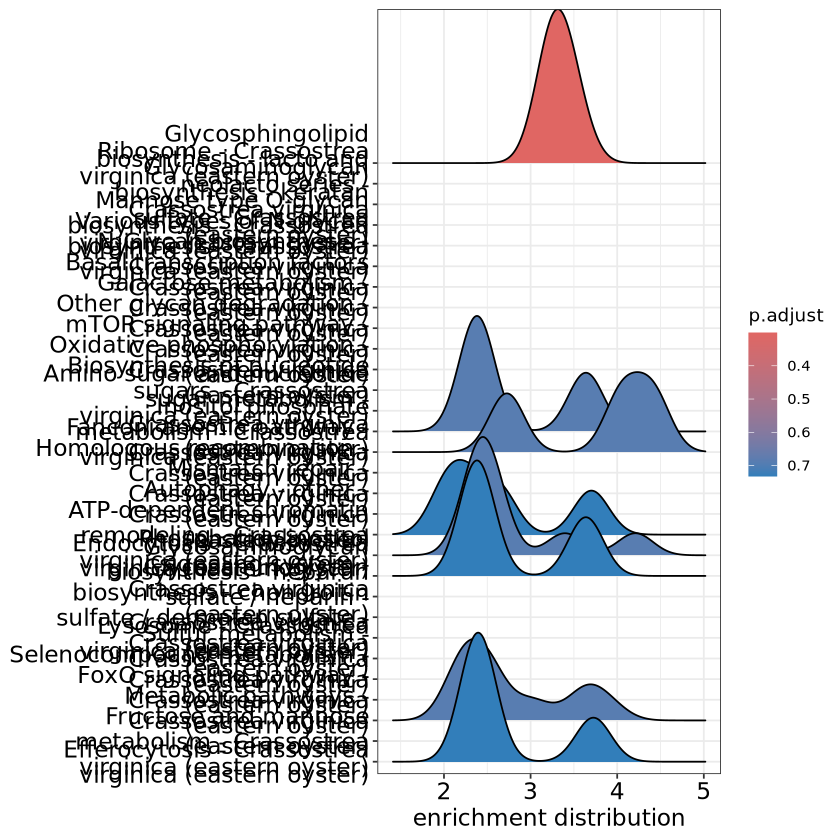

In [52]:
ridgeplot(kk2) + labs(x = "enrichment distribution")

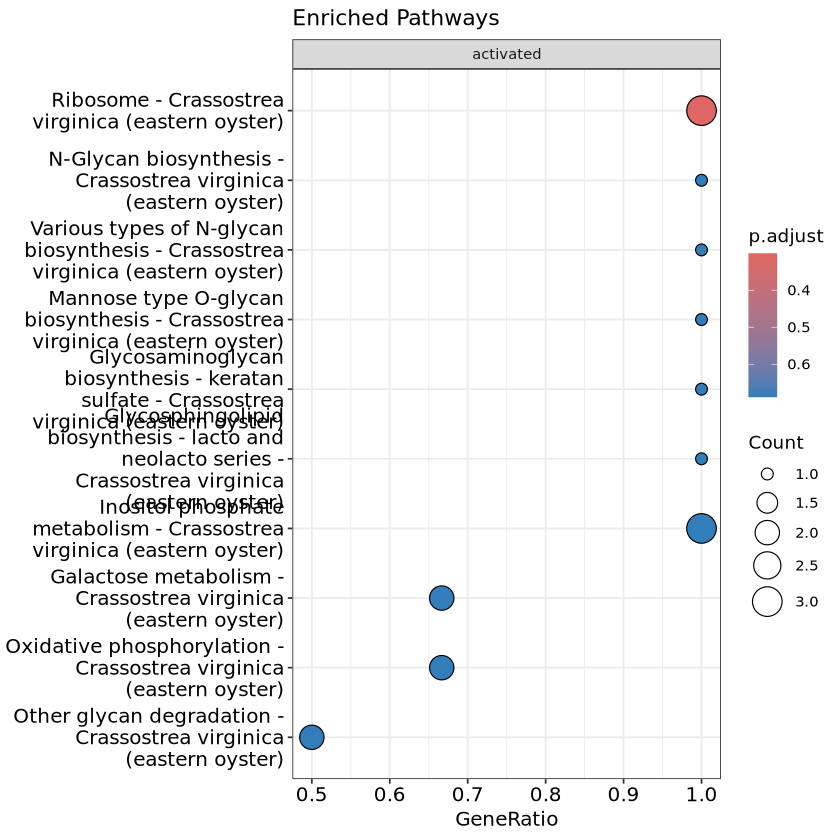

In [53]:
dotplot(kk2, showCategory = 10, title = "Enriched Pathways" , split=".sign") + facet_grid(.~.sign)
